<a href="https://colab.research.google.com/github/JeppeAndersson22/DatascienceCars/blob/main/Autouncle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AutoUncle Machine Learning

In [ ]:
import pandas as pd

# Define path to the file
file_path = '/content/drive/MyDrive/BI/DSP/clean_car_data.xlsx'

# Load the dataset into a pandas dataframe
car_data = pd.read_excel(file_path)


# Saving the first few rows to confirm it's loaded correctly and the columns are labelled
preview = car_data.head()

# Saving some descriptive statistics similar to R's summary function
descriptive_stats = car_data.describe()



In [ ]:
car_data

,Brand,Model,DaysOnTheMarket,Year,KilometersDriven,Transmission,Horsepower,Km/l,Price,FuelType,EngineSize
0,VW,Tiguan,146,2018,172000,Automatgear,190.0,17.5,254900,Diesel,2.0
1,VW,Tiguan,5,2021,24000,Automatgear,150.0,17.5,314900,Benzin,1.5
2,VW,Tiguan,247,2019,60000,Automatgear,150.0,18.0,309900,Benzin,1.5
3,VW,Tiguan,239,2022,6000,Automatgear,245.0,37.1,369900,Hybrid,1.4
4,VW,Tiguan,121,2022,35000,Automatgear,150.0,17.8,339700,Benzin,1.5
...,...,...,...,...,...,...,...,...,...,...,...
5513,Skoda,Citigo,32,2017,118000,Manuelt gear,60.0,24.4,84800,Benzin,1.0
5514,Skoda,Citigo,411,2014,182000,Manuelt gear,60.0,24.4,59000,Benzin,1.0
5515,Skoda,Citigo,537,2016,185000,Manuelt gear,60.0,24.4,64800,Benzin,1.0
5516,Skoda,Citigo,16,2012,147000,Automatgear,75.0,22.2,79800,Benzin,1.0


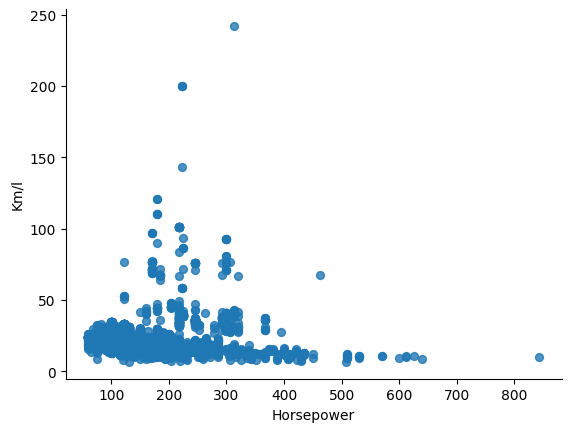

In [ ]:
# @title Horsepower vs Km/L

from matplotlib import pyplot as plt
car_data.plot(kind='scatter', x='Horsepower', y='Km/l', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

The car with 800 horse powers exists. [See it here](https://www.autouncle.dk/da/brugte-biler/Mercedes?s%5Bmin_hp%5D=800&search_form=1).
Same occurs for the cars with high km/l: [See here](https://www.autouncle.dk/da/brugte-biler?s%5Bmin_fuel_economy%5D=200.0&search_form=1)

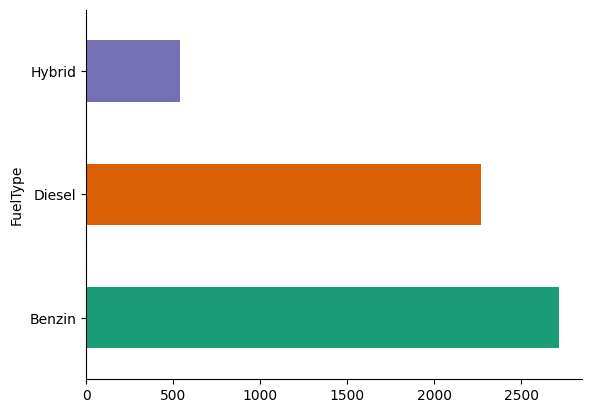

In [ ]:
# @title Fuel

from matplotlib import pyplot as plt
import seaborn as sns
car_data.groupby('FuelType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The majority is fuel and diesel. A bit misproportioned dataset

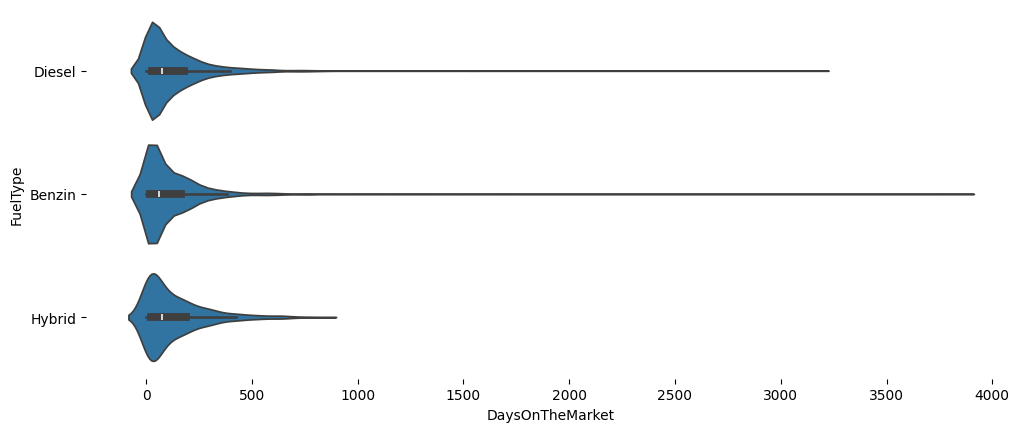

In [ ]:
# @title Fuel Type vs DaysForSale

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(car_data['FuelType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(car_data, x='DaysOnTheMarket', y='FuelType', inner='box')
sns.despine(top=True, right=True, bottom=True, left=True)

Long tail for fossile fuel. Might be outliers

Basic statistics

In [ ]:
preview #like head in R

,Brand,Model,DaysOnTheMarket,Year,KilometersDriven,Transmission,Horsepower,Km/l,Price,FuelType,EngineSize
0,VW,Tiguan,146,2018,172000,Automatgear,190.0,17.5,254900,Diesel,2.0
1,VW,Tiguan,5,2021,24000,Automatgear,150.0,17.5,314900,Benzin,1.5
2,VW,Tiguan,247,2019,60000,Automatgear,150.0,18.0,309900,Benzin,1.5
3,VW,Tiguan,239,2022,6000,Automatgear,245.0,37.1,369900,Hybrid,1.4
4,VW,Tiguan,121,2022,35000,Automatgear,150.0,17.8,339700,Benzin,1.5


In [ ]:
descriptive_stats = descriptive_stats.round(2)
descriptive_stats #like summary in R

,DaysOnTheMarket,Year,KilometersDriven,Horsepower,Km/l,Price,EngineSize
count,5518.00,5518.00,5518.00,5507.00,5454.00,5518.00,5443.00
mean,123.71,2018.04,101731.00,154.83,24.03,228774.01,1.70
std,168.80,4.17,78703.25,66.50,11.44,153656.69,0.64
min,0.00,1979.00,0.00,60.00,6.60,2950.00,0.90
25%,24.00,2016.00,40811.50,110.00,19.50,130000.00,1.40
50%,67.00,2019.00,89000.00,140.00,22.20,199900.00,1.50
75%,171.00,2021.00,145650.00,184.00,25.60,289900.00,2.00
max,3842.00,2024.00,636000.00,843.00,242.00,2499900.00,6.80


In [ ]:
# Display summary statistics for non-numerical columns
non_numeric_summary = car_data.select_dtypes(include=['object']).describe()
print(non_numeric_summary)

       Brand    Model Transmission FuelType
count   5518     5518         5518     5516
unique    10       98            2        3
top       VW  Octavia  Automatgear   Benzin
freq     958      255         3417     2713


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


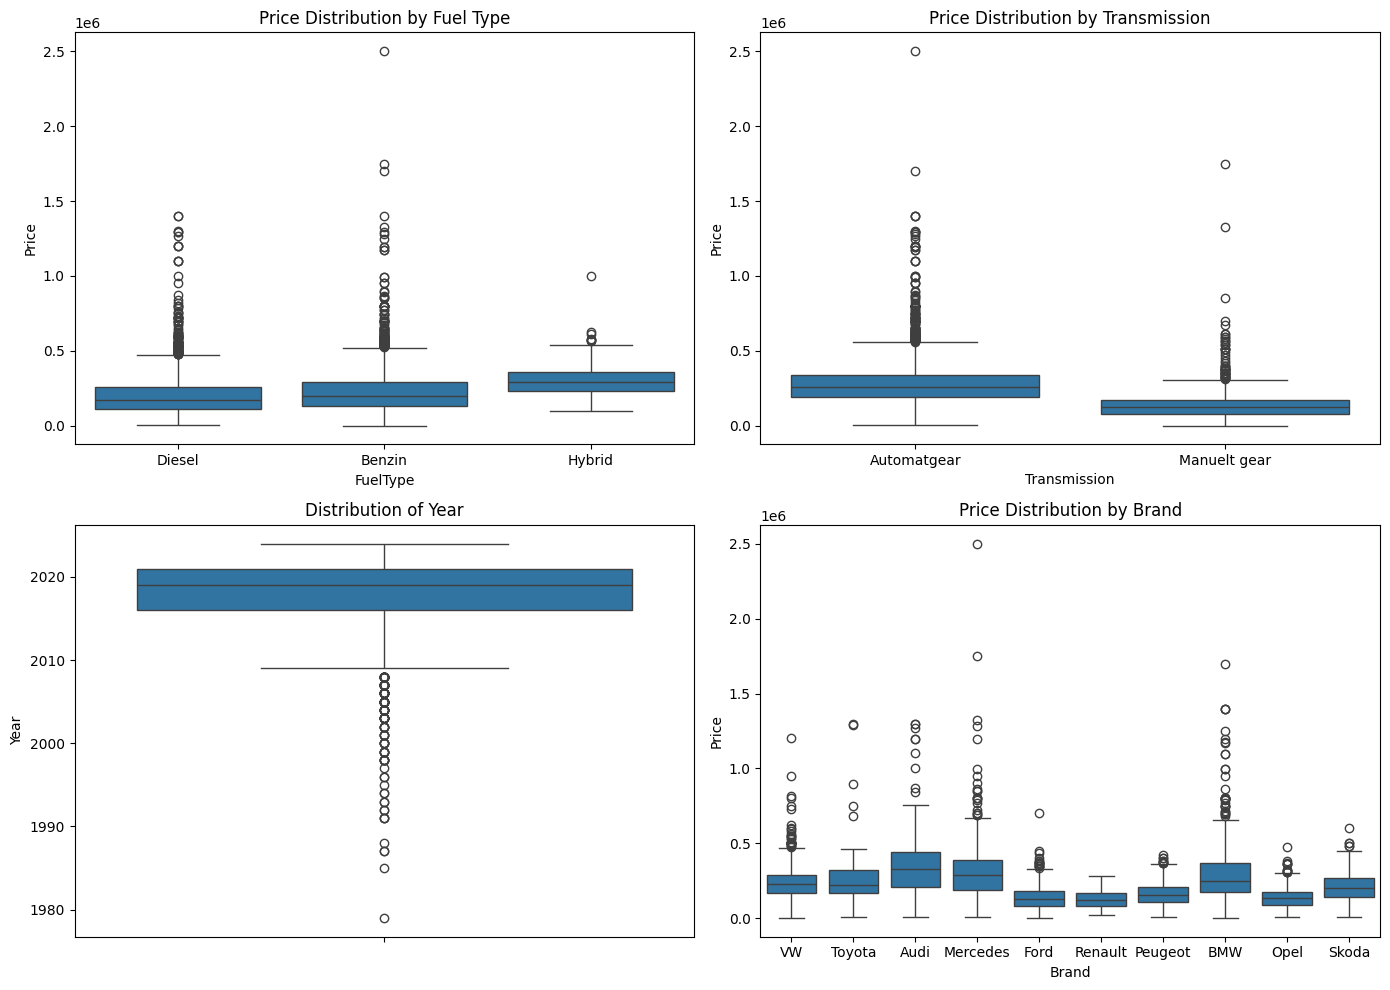

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the box plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(ax=axes[0, 0], x=car_data['FuelType'], y=car_data['Price'])
axes[0, 0].set_title('Price Distribution by Fuel Type')

sns.boxplot(ax=axes[0, 1], x=car_data['Transmission'], y=car_data['Price'])
axes[0, 1].set_title('Price Distribution by Transmission')

sns.boxplot(ax=axes[1, 0], data=car_data, y='Year', orient='h')
axes[1, 0].set_title('Distribution of Year')

sns.boxplot(ax=axes[1, 1], x=car_data['Brand'], y=car_data['Price'])
axes[1, 1].set_title('Price Distribution by Brand')

plt.tight_layout()
plt.show()


#Interpretation of each:

**Price Distribution by Fuel Type:**
* Diesel, Benzin (Petrol), and Hybrid cars are all present with a range of prices.
* Diesel and Petrol cars show a similar distribution of prices, with many outliers indicating that there are several significantly more expensive cars in these fuel categories.
* Hybrid cars appear to have a higher median price than Diesel and Petrol but fewer high-priced outliers.

**Price Distribution by Transmission Type:**
* There are two types of Transmission transmissions represented: Automatic (AutomatTransmission) and Manual (Manuelt Transmission).
* Automatic cars have a higher median price than manual cars and a wider interquartile range (IQR), which suggests more variability in the pricing of automatic cars.
* There are many high-priced outliers in the automatic category, much more so than in the manual category.

**Distribution of Year (Year):**
* This plot shows the distribution of the year of manufacture for the cars in the dataset.
* Most of the cars are from recent years, with a median around the late 2010s. The IQR is tight, indicating most cars are from a similar recent time period.
* There are some older cars, as indicated by the outliers prior to the year 2000, with one as far back as around 1980.

**Distribution by Brand**
...

# Missing values
## Exploration of missing values

In [ ]:
# Checking for missing values (NAs) in the dataset
na_counts = car_data.isnull().sum()

# Percentage of missing values
na_percentage = (car_data.isnull().mean() * 100).round(2)

# Create a DataFrame to display the count and percentage of NAs for each column
na_df = pd.DataFrame({'Count': na_counts, 'Percentage': na_percentage})
na_df[na_df['Count'] > 0]  # Filter to show only columns with missing values


,Count,Percentage
Horsepower,11,0.20
Km/l,64,1.16
FuelType,2,0.04
EngineSize,75,1.36


In [ ]:
# Displaying rows with missing values in any of the columns
rows_with_nas = car_data[car_data.isnull().any(axis=1)]
rows_with_nas  # Show the first few rows with missing values


,Brand,Model,DaysOnTheMarket,Year,KilometersDriven,Transmission,Horsepower,Km/l,Price,FuelType,EngineSize
36,VW,Tiguan,30,2021,38000,Automatgear,150.0,NaN,379900,Benzin,1.5
408,VW,Passat,72,2022,10000,Automatgear,218.0,NaN,349900,Hybrid,1.4
507,VW,Polo,244,2023,13000,Automatgear,95.0,NaN,244900,Benzin,1.0
647,VW,Polo,398,2023,14000,Automatgear,95.0,NaN,260980,Benzin,1.0
885,VW,T-Roc,170,2018,77000,Manuelt gear,115.0,NaN,179900,Benzin,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5238,Skoda,Superb,429,2022,25000,Automatgear,156.0,NaN,359900,Benzin,1.4
5240,Skoda,Superb,36,2015,240000,Automatgear,160.0,14.0,129500,Benzin,NaN
5335,Skoda,Karoq,305,2021,15000,Automatgear,150.0,NaN,403580,Benzin,1.5
5411,Skoda,Kamiq,82,2023,17691,Automatgear,110.0,NaN,269900,Benzin,1.0


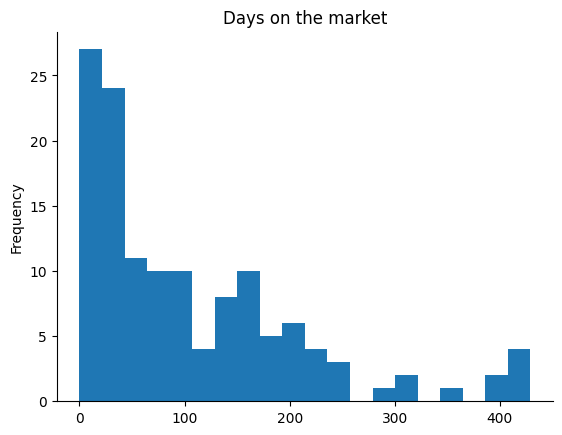

In [ ]:
# @title Days on the market

from matplotlib import pyplot as plt
rows_with_nas['DaysOnTheMarket'].plot(kind='hist', bins=20, title='Days on the market')
plt.gca().spines[['top', 'right',]].set_visible(False)

#Working with outliers


In [ ]:
# Function to calculate lower and upper bounds for each numerical column to identify outliers
def find_iqr_bounds(car_data, column):
    Q1 = car_data[column].quantile(0.25)
    Q3 = car_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.5 * IQR
    upper_bound = Q3 + 2.5 * IQR
    return lower_bound, upper_bound

# 1) Exploring outliers based on IQR
outliers = {}
for column in car_data.select_dtypes(include=['float64', 'int64']).columns:
    lower_bound, upper_bound = find_iqr_bounds(car_data, column)
    outliers[column] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers": car_data[(car_data[column] < lower_bound) | (car_data[column] > upper_bound)]
    }

# Get the number of outliers for one of the columns (Pricee)
num_outliers_price = len(outliers['Price']['Outliers'])
num_outliers_price



81

In [ ]:
# Exploring outliers based on IQR
for column in car_data.select_dtypes(include=['float64', 'int64']).columns:
    lower_bound, upper_bound = find_iqr_bounds(car_data, column)
    print(f"{column} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

DaysOnTheMarket - Lower Bound: -343.5, Upper Bound: 538.5
Year - Lower Bound: 2003.5, Upper Bound: 2033.5
KilometersDriven - Lower Bound: -221284.75, Upper Bound: 407746.25
Horsepower - Lower Bound: -75.0, Upper Bound: 369.0
Km/l - Lower Bound: 4.2499999999999964, Upper Bound: 40.85000000000001
Price - Lower Bound: -269750.0, Upper Bound: 689650.0
EngineSize - Lower Bound: -0.10000000000000031, Upper Bound: 3.5


**Deleting outliers**

In [ ]:
# 2) Deleting outliers based on IQR for the 'Price' column
# Copy the original dataframe to avoid altering the original data
cleaned_data = car_data.copy()

for column in cleaned_data.select_dtypes(include=['float64', 'int64']).columns:
    lower_bound, upper_bound = find_iqr_bounds(cleaned_data, column)
    cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]

cleaned_data.shape

(4885, 11)

In [ ]:
# Deleting rows with any NA values from the already cleaned data without outliers
cleaned_data_no_nas = cleaned_data.dropna()

cleaned_data_no_nas.shape


(4883, 11)

Only two of the observations in the cleansed dataset had NAs, suggestion a clear correlation between NAs and outliers. However, of course, there were more outliers than NAs.

**Removal of 'DaysOnTheMarket'**

In [ ]:
# Drop the 'DaysOnTheMarket' column from the DataFrame
cleaned_data_no_nas = cleaned_data_no_nas.drop('DaysOnTheMarket', axis=1)

**Filtering cars with a price tag under 15.000 out, as we assume those are leasing**

In [ ]:
# Update the DataFrame to only include cars with prices 15,000 or higher to avoid leasing
cleaned_data_no_nas = cleaned_data_no_nas[cleaned_data_no_nas['Price'] >= 15000]


In [ ]:
cleaned_data_no_nas

,Brand,Model,Year,KilometersDriven,Transmission,Horsepower,Km/l,Price,FuelType,EngineSize
0,VW,Tiguan,2018,172000,Automatgear,190.0,17.5,254900,Diesel,2.0
1,VW,Tiguan,2021,24000,Automatgear,150.0,17.5,314900,Benzin,1.5
2,VW,Tiguan,2019,60000,Automatgear,150.0,18.0,309900,Benzin,1.5
3,VW,Tiguan,2022,6000,Automatgear,245.0,37.1,369900,Hybrid,1.4
4,VW,Tiguan,2022,35000,Automatgear,150.0,17.8,339700,Benzin,1.5
...,...,...,...,...,...,...,...,...,...,...
5513,Skoda,Citigo,2017,118000,Manuelt gear,60.0,24.4,84800,Benzin,1.0
5514,Skoda,Citigo,2014,182000,Manuelt gear,60.0,24.4,59000,Benzin,1.0
5515,Skoda,Citigo,2016,185000,Manuelt gear,60.0,24.4,64800,Benzin,1.0
5516,Skoda,Citigo,2012,147000,Automatgear,75.0,22.2,79800,Benzin,1.0


In [ ]:
round(cleaned_data_no_nas.describe(), 2)

,Year,KilometersDriven,Horsepower,Km/l,Price,EngineSize
count,4861.00,4861.00,4861.00,4861.00,4861.0,4861.00
mean,2018.13,103503.85,145.66,22.80,210861.9,1.62
std,3.51,74042.27,52.76,5.29,112092.4,0.47
min,2004.00,0.00,60.00,8.00,15000.0,0.90
25%,2016.00,46400.00,110.00,19.60,129900.0,1.30
50%,2018.00,93000.00,136.00,22.20,194900.0,1.50
75%,2020.00,148000.00,170.00,25.00,274800.0,2.00
max,2024.00,400000.00,367.00,40.80,653580.0,3.60


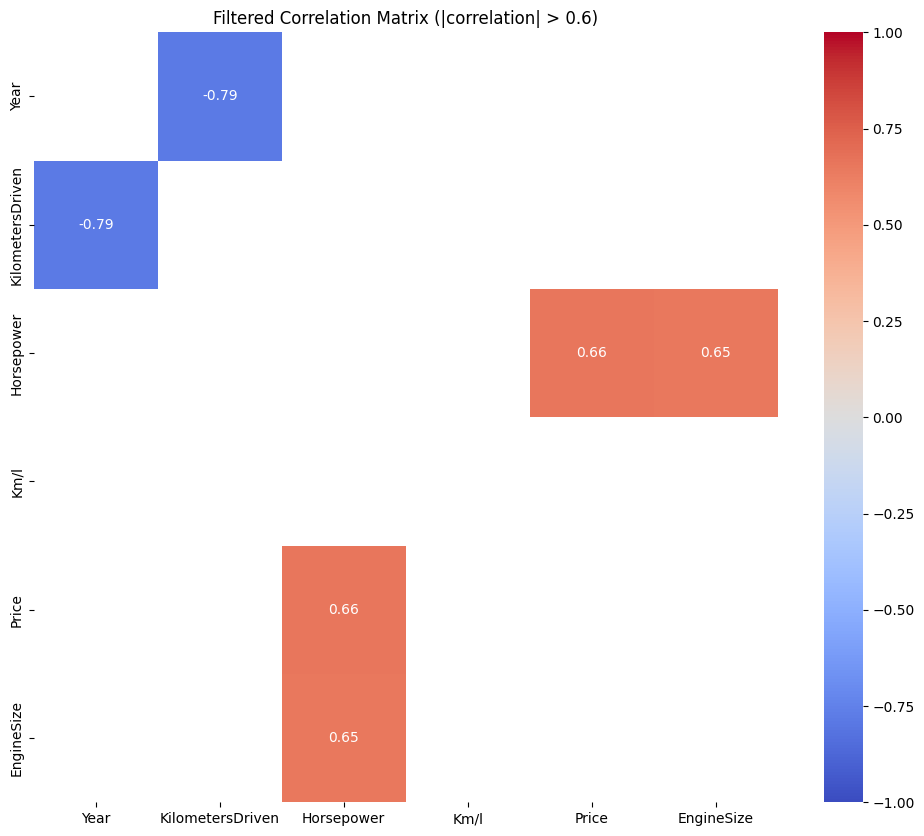

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cleaned_data_no_nas is already defined and loaded

# Step 1: Select only numeric columns
numeric_data = cleaned_data_no_nas.select_dtypes(include=[np.number])

# Step 2: Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Step 3: Filter the correlation matrix to show only correlations with an absolute value greater than 0.8
filtered_correlation_matrix = correlation_matrix[(correlation_matrix.abs() > 0.6) & (correlation_matrix != 1.0)]

# Step 4: Display the filtered correlation matrix in a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Filtered Correlation Matrix (|correlation| > 0.6)')
plt.show()


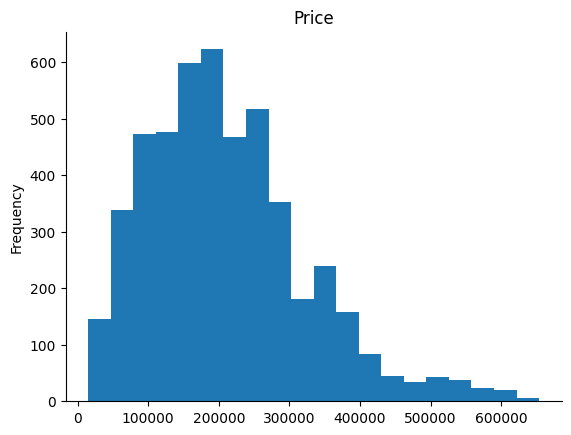

In [ ]:
# @title Price

from matplotlib import pyplot as plt
cleaned_data_no_nas['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Machine learning
## Preparation


In [ ]:

from sklearn.model_selection import train_test_split
import random

random.seed(999)

# Preparing the features (independent variables) and target (dependent variable)
X = cleaned_data_no_nas.drop('Price', axis=1)  # Features
y = cleaned_data_no_nas['Price']  # Target

# Encoding categorical variables using get_dummies
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and test sets with 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.20, random_state=42)

(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((3888, 103), (973, 103)), ((3888,), (973,)))

#Standardization of numerical columns


When using Random Forest as the machine learning model of choice, you don't need to worry about scaling or standardizing your features, because Random Forest is a tree-based model that does not require feature scaling. This is also true for XGBoost when using a tree base learner; strictly speaking, tree-based methods do not require explicit data standardization. However, for neural networks, it is required.
See more at [Towards Data Science](https://towardsdatascience.com/do-decision-trees-need-feature-scaling-97809eaa60c6)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the specified columns
selected_columns = ['Year', 'KilometersDriven', 'Horsepower', 'Km/l']

# Calculate mean and standard deviation for X_train
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

# Standardize the selected columns in train_data
X_train[selected_columns] -= mean
X_train[selected_columns] /= std

# Standardize the selected columns in test_data using the same mean and std from X_train
X_test[selected_columns] -= mean
X_test[selected_columns] /= std

X_train.shape

(3888, 103)

# Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Predict on the training data
y_train_pred = linear_reg.predict(X_train)

# Predict on the test data
y_test_pred = linear_reg.predict(X_test)

# Calculate and print the performance metrics for both train and test sets
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)


train_rmse, test_rmse


(40398.0990967924, 3228732175452465.0)

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Random Forest Regressor model
random_forest_reg = RandomForestRegressor(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 15, 20],
    'max_features': ['sqrt', 'log2']
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_reg, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Predict on the training data using the best parameters
y_train_pred_rf = best_rf.predict(X_train)

# Predict on the test data using the best parameters
y_test_pred_rf = best_rf.predict(X_test)

# Calculate RMSE for both train and test sets
train_rmse_rf = mean_squared_error(y_train, y_train_pred_rf, squared=False)
test_rmse_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)

# Convert negative RMSE scores from cross-validation to positive values and calculate the mean
cv_rmse_scores = -grid_search.best_score_
mean_cv_rmse = np.sqrt(cv_rmse_scores)

# Output the training and testing metrics, and the cross-validation results
print("Train RMSE:", train_rmse_rf)
print("Test RMSE:", test_rmse_rf)
print("Best GridSearch RMSE:", mean_cv_rmse)
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Train RMSE: 18255.78089788868
Test RMSE: 38304.54682891977
Best GridSearch RMSE: 190.0392879570402
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 500}


##Trying to CV the random forrest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Random Forest Regressor model with adjusted parameters
random_forest_reg = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,  # Reduced max_depth
    max_features='sqrt',  # Using sqrt of total features
    random_state=42
)

# Use cross-validation to evaluate the model
cv_rmse_scores = cross_val_score(random_forest_reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model to the training data
random_forest_reg.fit(X_train, y_train)

# Predict on the training data
y_train_pred_rf = random_forest_reg.predict(X_train)

# Predict on the test data
y_test_pred_rf = random_forest_reg.predict(X_test)

# Calculate RMSE for both train and test sets
train_rmse_rf = mean_squared_error(y_train, y_train_pred_rf, squared=False)
test_rmse_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)


# Output the training and testing metrics, and the cross-validation results
print("Train RMSE:", train_rmse_rf)
print("Test RMSE:", test_rmse_rf)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Train RMSE: 18255.78089788868
Test RMSE: 38304.54682891977


## Visualizing branches

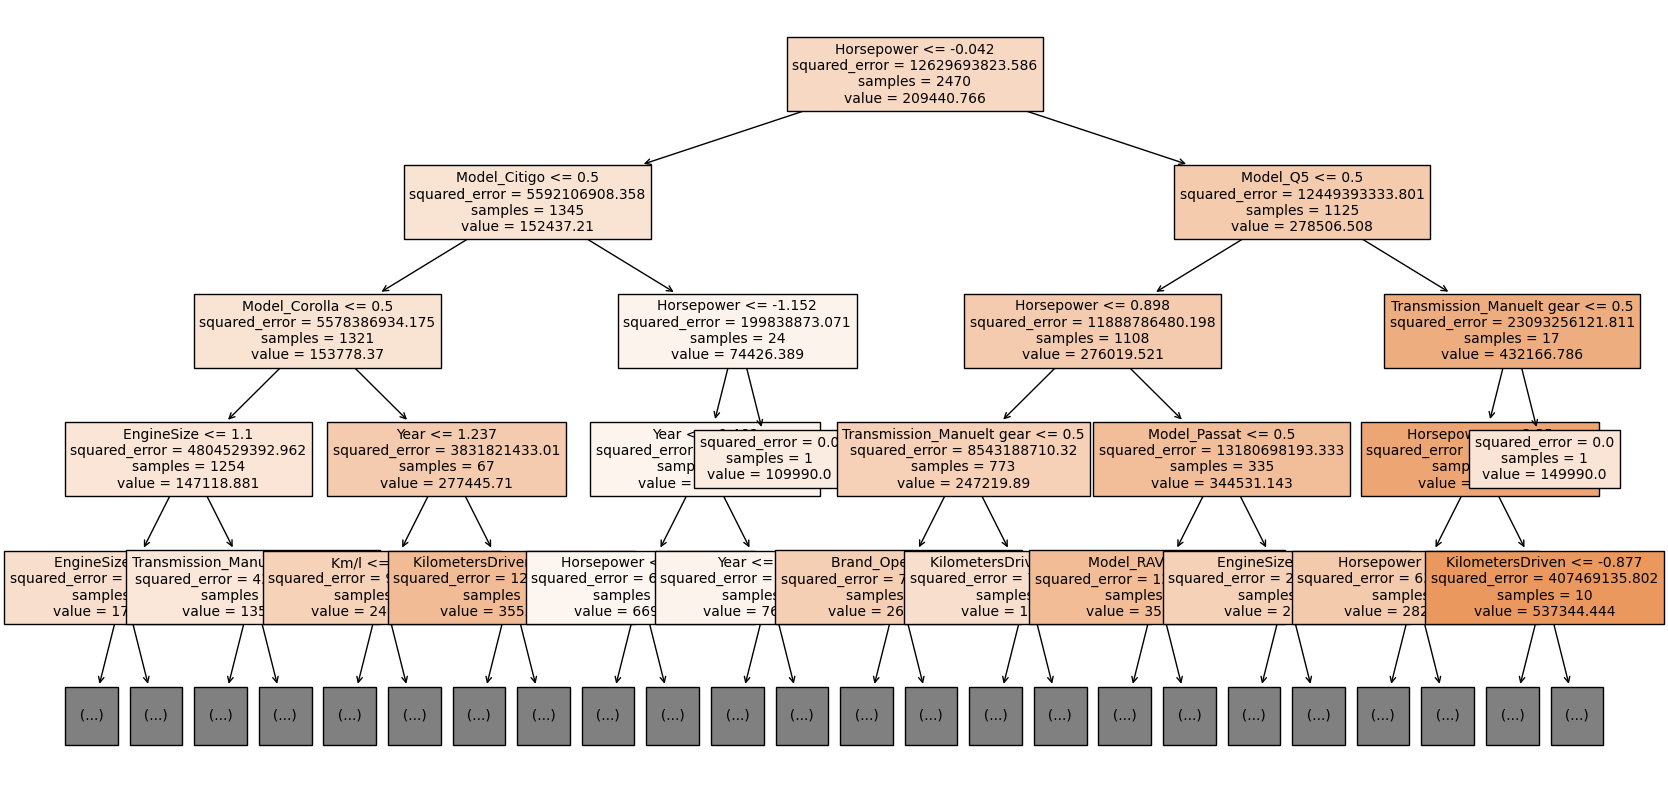

In [ ]:
# Extract one tree from the random forest
tree = random_forest_reg.estimators_[0]
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Simple plot of the tree
plt.figure(figsize=(20,10))  # Set the size of the figure
plot_tree(tree, filled=True, feature_names=X_train.columns, max_depth=4, fontsize=10)
plt.show()

#Neural network

##Conversion

In [ ]:
import tensorflow as tf

# Convert arrays to numpy arrays first
X_train_array = X_train.values
X_test_array = X_test.values

Y_train_array = y_train.values
Y_pred_test_array = y_test.values

# Convert numpy arrays to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train_array, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test_array, dtype=tf.float32)

Y_train_tensor = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
Y_test_tensor = tf.convert_to_tensor(y_test.values, dtype=tf.float32)



##Model preparation

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models

model = keras.Sequential([
layers.Dense(128, activation="relu"),
layers.Dense(128, activation="relu"),
layers.Dense(128, activation="relu"),
layers.Dense(64, activation="relu"),
layers.Dense(1)
])

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="deep_learning_model",
        save_best_only=True,
        monitor="val_mae",  # Monitor validation mae for saving the best model
        mode='min'  # Minimize the monitored quantity
    )
]

# Train the model
history = model.fit(X_train_tensor, Y_train_tensor, epochs=250,
                    batch_size=256, validation_split=0.2,
                    callbacks=callbacks, verbose=0)


In [ ]:
train_mse_score, train_rmse_score = model.evaluate(X_train_tensor, Y_train_tensor)

122/122 [==============================] - 1s 6ms/step - loss: 1020478336.0000 - mae: 20042.9023


In [ ]:
# Convert MSE to RMSE
train_rmse_score = np.sqrt(train_mse_score)
print("Train RMSE Score:", train_rmse_score)

Train RMSE Score: 31944.926608148595


In [ ]:
test_mse_score, test_rmse_score = model.evaluate(X_test_tensor, Y_test_tensor)

31/31 [==============================] - 0s 2ms/step - loss: 1562852096.0000 - mae: 22741.5996


In [ ]:
# Convert MSE to RMSE
test_rmse_score = np.sqrt(test_mse_score)

print("Test MSE Score:", test_mse_score)
print("Test RMSE Score:", test_rmse_score)

Test MSE Score: 1562852096.0
Test RMSE Score: 39532.92420249228


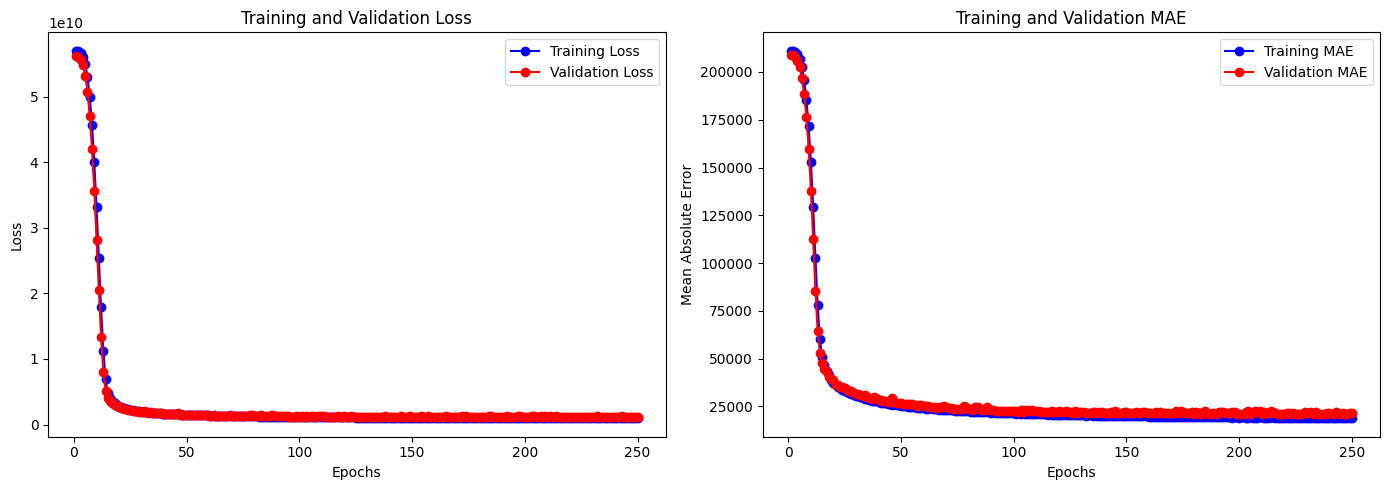

In [ ]:
import matplotlib.pyplot as plt

# Saving the history
history_dict = history.history

# Extracting loss and accuracy history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_mae = history_dict['mae']  # Assuming 'mae' is the metric for mean absolute error
val_mae = history_dict['val_mae']  # Assuming 'val_mae' is the validation metric for mean absolute error

epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.figure(figsize=(14, 5))

# Training and validation loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training and validation MAE plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_mae, 'bo-', label='Training MAE')
plt.plot(epochs, val_mae, 'ro-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()  # Adjusts the plots to ensure they don't overlap
plt.show()



# XGBoost

In [ ]:
# Import necessary libraries
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Parameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.3]
}

# Initialize the XGBoost regressor
xgb_reg = XGBRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit GridSearchCV on the training data only
grid_search.fit(X_train, y_train)

# Best parameters and best score from the training data
best_parameters = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

# Re-fit a model with the best parameters on the training data
final_model = XGBRegressor(**best_parameters, random_state=42)
final_model.fit(X_train, y_train)

# Predictions on the test set using the best parameters
y_pred = final_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_parameters)
print("Best RMSE from Grid Search:", best_score)
print("RMSE on Test set:", rmse)
print("R^2 on Test set:", r2)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE from Grid Search: 35220.17091007766
RMSE on Test set: 37693.88473774869
R^2 on Test set: 0.8895051395585507


##Application of k-fold cross-validation to the XGBoost regressor

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor

# Assuming 'cleaned_data_no_nas' is loaded and available
X = cleaned_data_no_nas.drop('Price', axis=1)
y = cleaned_data_no_nas['Price']

# Encoding categorical variables and preparing data
X_encoded = pd.get_dummies(X, drop_first=True)

# Number of folds
n_splits = 5

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
rmse_train_scores = []
rmse_test_scores = []
mae_train_scores = []
mae_test_scores = []
r2_test_scores = []

# Cross-validation process
for train_index, test_index in kf.split(X_encoded):
    X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and fit XGBoost
    xgb_reg = XGBRegressor(n_estimators=500, max_depth=3, learning_rate=0.1, random_state=42)
    xgb_reg.fit(X_train, y_train)

    # Predictions
    y_train_pred_xgb = xgb_reg.predict(X_train)
    y_test_pred_xgb = xgb_reg.predict(X_test)

    # Metrics calculation
    train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
    test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
    train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
    test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
    test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

    # Append scores to lists
    rmse_train_scores.append(train_rmse_xgb)
    rmse_test_scores.append(test_rmse_xgb)
    mae_train_scores.append(train_mae_xgb)
    mae_test_scores.append(test_mae_xgb)
    r2_test_scores.append(test_r2_xgb)

# Calculate average of the scores
avg_train_rmse = np.mean(rmse_train_scores)
avg_test_rmse = np.mean(rmse_test_scores)
avg_train_mae = np.mean(mae_train_scores)
avg_test_mae = np.mean(mae_test_scores)
avg_test_r2 = np.mean(r2_test_scores)

# Print rounded average scores
print("Average Train RMSE:", round(avg_train_rmse, 2))
print("Average Test RMSE:", round(avg_test_rmse, 2))
print("Average Train MAE:", round(avg_train_mae, 2))
print("Average Test MAE:", round(avg_test_mae, 2))
print("Average Test R^2:", round(avg_test_r2, 4))


Average Train RMSE: 26961.77
Average Test RMSE: 35780.39
Average Train MAE: 18260.87
Average Test MAE: 22541.88
Average Test R^2: 0.8971


# Variable importance projection (VIP)

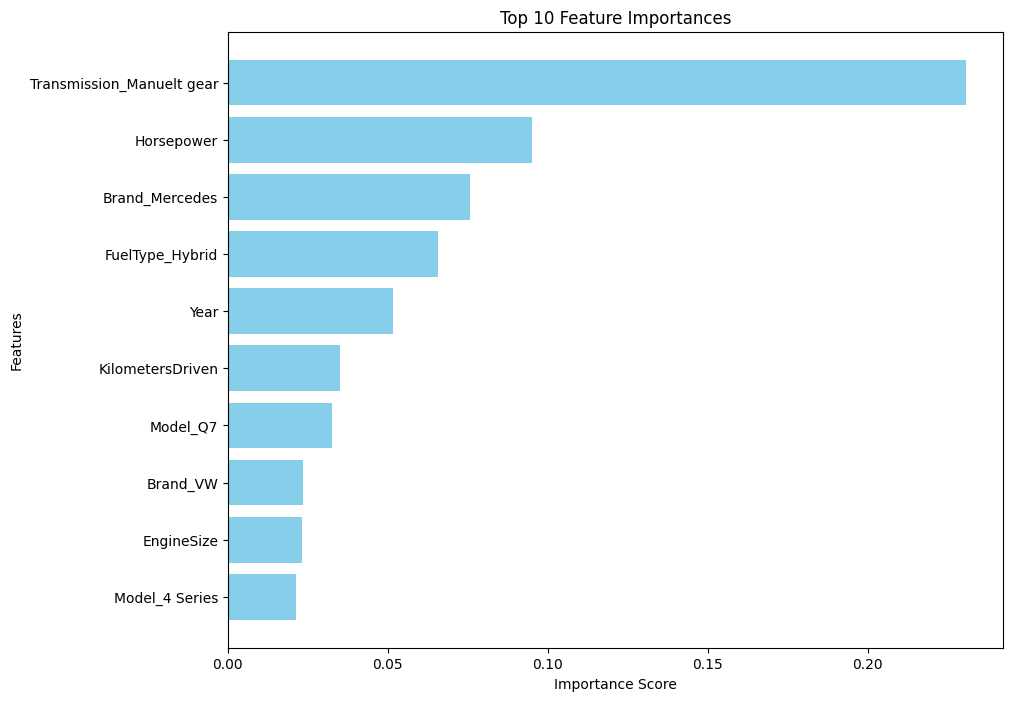

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

features = X_train.columns
importances = xgb_reg.feature_importances_

# Sort features by their importance scores
sorted_idx = np.argsort(importances)[::-1]


# Select the top 10 features
top_n = 10
sorted_features = np.array(features)[sorted_idx][:top_n]
sorted_importances = np.array(importances)[sorted_idx][:top_n]

# Create a bar chart for the top N features
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

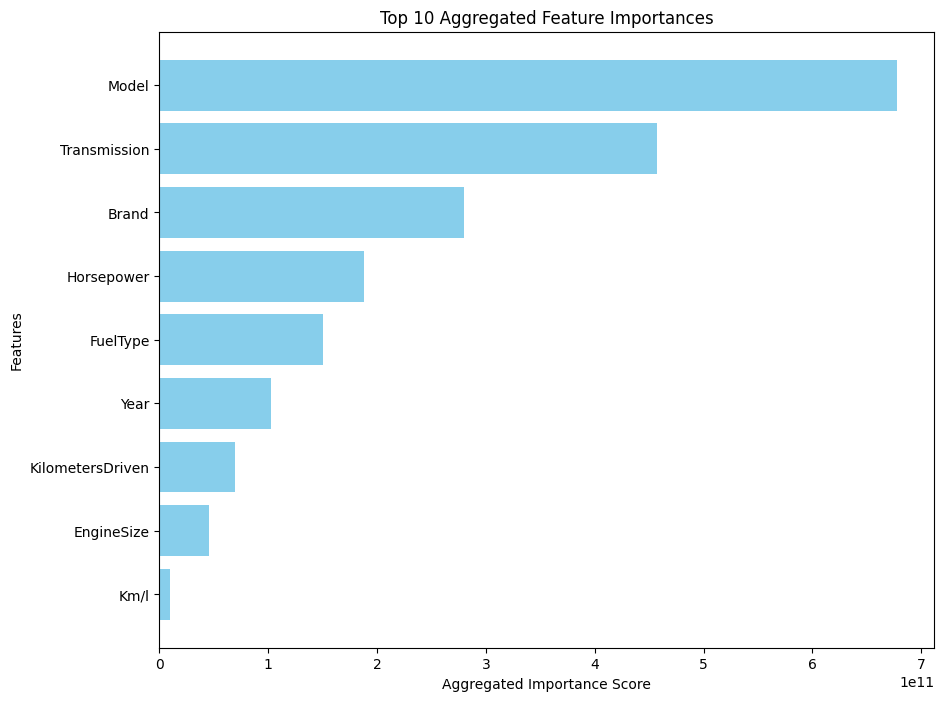

In [ ]:
from collections import defaultdict

# Extract feature importances based on gain
feature_importance_gain = xgb_reg.get_booster().get_score(importance_type='gain') #choosing gain based on https://towardsdatascience.com/be-careful-when-interpreting-your-features-importance-in-xgboost-6e16132588e7

def aggregate_feature_importances(feature_importances):
    # Create a default dictionary to hold aggregated importances
    aggregated_importances = defaultdict(float)

    # Loop over all features and their importances
    for feature, importance in feature_importances.items():
        # Split the feature name by underscore
        original_feature = feature.split('_')[0]
        # Sum the importances for the original feature
        aggregated_importances[original_feature] += importance

    return aggregated_importances

# Aggregate the feature importances
feature_importance = feature_importance_gain  # Use the appropriate importance dictionary
aggregated_importances = aggregate_feature_importances(feature_importance)

# Sort features by their aggregated importance scores
sorted_features = sorted(aggregated_importances, key=aggregated_importances.get, reverse=True)

# Now, if you want to plot only the top 10 features
top_n = 10
sorted_features_top_n = sorted_features[:top_n]
sorted_importances_top_n = [aggregated_importances[feature] for feature in sorted_features_top_n]

# Create a bar chart for the top N features
plt.figure(figsize=(10, 8))
plt.barh(sorted_features_top_n, sorted_importances_top_n, color='skyblue')
plt.xlabel('Aggregated Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Aggregated Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


#Predict prices


###Input

In [ ]:
input_data = {
    'Brand': ['BMW'],
    'Model': ['1-Serie'],
    'DaysOnTheMarket': [310],
    'Year': [2020],
    'KilometersDriven': [50000],
    'Transmission': ['Manual'],
    'Horsepower': [150],
    'Km/l': [20],
    'FuelType': ['Hybrid'],
    'EngineSize': [1.5]
}
input_df = pd.DataFrame(input_data)


In [ ]:
# Encode the categorical variables
input_encoded = pd.get_dummies(input_df)

# Make sure that the input DataFrame has the same columns as the training features
# Fill missing columns with zeros to align with the training data
input_encoded = input_encoded.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
# Assuming X_train and y_train are your features and labels for training
xgb_reg.fit(X_train, y_train)
predicted_price = xgb_reg.predict(input_encoded)
print("Predicted Price:", predicted_price[0])

Predicted Price: 304150.1
